In [120]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [121]:
# Loading the dataset
df = pd.read_csv('train.csv')

In [122]:
#checking the shape of dataset
df.shape

(20800, 5)

In [123]:
#checking the cloumn of dataset
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [124]:
#checking the first 5 entries of the dataset
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [125]:
# Dropping the 'id' column
df.drop('id', axis=1, inplace=True)

In [126]:
#after dropping the ID column
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [127]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

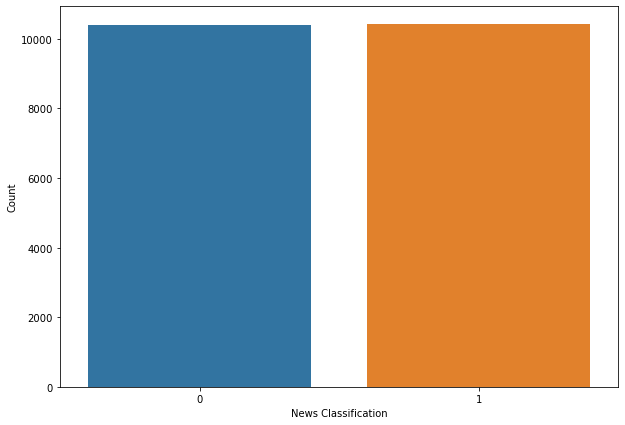

In [128]:
# Visualizing the count of 'fake news' in the dataset
plt.figure(figsize=(10,7))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')

# Data Cleaning and Pre Processing

In [129]:
print(df.shape)

(20800, 4)


In [130]:
# Finding any NaN values
df.isna().any()

title      True
author     True
text       True
label     False
dtype: bool

In [131]:
# Dropping NaN values
df.dropna(inplace=True)
print(df.shape)

(18285, 4)


In [132]:
news = df.copy()

In [133]:
#Indexing the dataset
news.reset_index(inplace=True)

In [134]:
# Importing essential libraries for performing Natural Language Processing on 'fake_train' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords #for removing the stopwords
from nltk.stem import PorterStemmer #for stemming
from nltk.stem import WordNetLemmatizer #For lemmetizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\19058\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [135]:
# Cleaning the news
corpus = []
lm = WordNetLemmatizer()

for i in range(0,news.shape[0]):

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmetising the words ans In stemming and Lemmetising I prefer Lemmeting
  words = [lm.lemmatize(word) for word in words]

  # Joining the stemmed words
  title = ' '.join(words)

  # Building a corpus of news-title
  corpus.append(title)

In [136]:
#checking my corpus
corpus[0:100]

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

# TF-IDF Vectoriser Implementation

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=3, max_df = 0.75, max_features=None, ngram_range=(1,3))
X = tfidf.fit_transform(corpus).toarray()

In [138]:
#checking the shape of the vector
X.shape

(18285, 13351)

# Splitting the Train Test for ML Models

In [139]:
# Extracting dependent variable from the dataset
y = news['label']

In [140]:
#splitting the test train dataset
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [141]:
# Modelling Algorithms
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

# Model Building

In [142]:
#Logistic regression model
model_1 = LogisticRegression(max_iter=900)
model_1.fit(X_train,Y_train)
pred_1 = model_1.predict(x_test)
cr1    = classification_report(y_test,pred_1)
print(cr1)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2040
           1       0.86      0.99      0.92      1617

    accuracy                           0.93      3657
   macro avg       0.93      0.93      0.93      3657
weighted avg       0.93      0.93      0.93      3657



In [143]:
#Naive Bias Model
model_2 = MultinomialNB()
model_2.fit(X_train,Y_train)
pred_2 = model_2.predict(x_test)
cr2    = classification_report(y_test,pred_2)
print(cr2)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2040
           1       0.94      0.79      0.85      1617

    accuracy                           0.88      3657
   macro avg       0.89      0.87      0.88      3657
weighted avg       0.89      0.88      0.88      3657



In [144]:
#Decision Tree Model
model_3 = DecisionTreeClassifier()
model_3.fit(X_train,Y_train)
pred_3 = model_3.predict(x_test)
cr3    = classification_report(y_test,pred_3)
print(cr3)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2040
           1       0.90      0.91      0.90      1617

    accuracy                           0.91      3657
   macro avg       0.91      0.91      0.91      3657
weighted avg       0.91      0.91      0.91      3657



In [145]:
#Random Forest Model
model_4 = RandomForestClassifier()
model_4.fit(X_train,Y_train)
pred_4 = model_4.predict(x_test)
cr4    = classification_report(y_test,pred_4)
print(cr4)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2040
           1       0.89      0.97      0.93      1617

    accuracy                           0.93      3657
   macro avg       0.93      0.94      0.93      3657
weighted avg       0.94      0.93      0.94      3657



In [146]:
#XGBOOST Classifier
model_5 = XGBClassifier()
model_5.fit(X_train,Y_train)
pred_5 = model_5.predict(x_test)
cr5    = classification_report(y_test,pred_5)
print(cr5)

C:\Users\19058\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2040
           1       0.88      0.98      0.92      1617

    accuracy                           0.93      3657
   macro avg       0.93      0.93      0.93      3657
weighted avg       0.93      0.93      0.93      3657



In [147]:
#Catboost Classifier
model_6 = CatBoostClassifier(iterations=200)
model_6.fit(X_train,Y_train)
pred_6 = model_6.predict(x_test)
cr6    = classification_report(y_test,pred_6)
print(cr6)

Learning rate set to 0.141718
0:	learn: 0.5100371	total: 137ms	remaining: 27.3s
1:	learn: 0.4072516	total: 256ms	remaining: 25.3s
2:	learn: 0.3477473	total: 406ms	remaining: 26.7s
3:	learn: 0.3104991	total: 522ms	remaining: 25.6s
4:	learn: 0.2887830	total: 660ms	remaining: 25.7s
5:	learn: 0.2762851	total: 764ms	remaining: 24.7s
6:	learn: 0.2660351	total: 871ms	remaining: 24s
7:	learn: 0.2602273	total: 1s	remaining: 24s
8:	learn: 0.2547077	total: 1.12s	remaining: 23.8s
9:	learn: 0.2499513	total: 1.23s	remaining: 23.4s
10:	learn: 0.2463713	total: 1.36s	remaining: 23.4s
11:	learn: 0.2438299	total: 1.48s	remaining: 23.3s
12:	learn: 0.2406583	total: 1.59s	remaining: 22.9s
13:	learn: 0.2386171	total: 1.7s	remaining: 22.5s
14:	learn: 0.2364460	total: 1.8s	remaining: 22.2s
15:	learn: 0.2347235	total: 1.9s	remaining: 21.8s
16:	learn: 0.2333919	total: 1.99s	remaining: 21.5s
17:	learn: 0.2317089	total: 2.09s	remaining: 21.2s
18:	learn: 0.2304574	total: 2.19s	remaining: 20.9s
19:	learn: 0.2289213	

161:	learn: 0.1578785	total: 17s	remaining: 3.99s
162:	learn: 0.1577091	total: 17.1s	remaining: 3.88s
163:	learn: 0.1574933	total: 17.2s	remaining: 3.78s
164:	learn: 0.1570684	total: 17.3s	remaining: 3.68s
165:	learn: 0.1568525	total: 17.4s	remaining: 3.57s
166:	learn: 0.1565514	total: 17.6s	remaining: 3.47s
167:	learn: 0.1563753	total: 17.7s	remaining: 3.36s
168:	learn: 0.1561964	total: 17.8s	remaining: 3.26s
169:	learn: 0.1558426	total: 17.9s	remaining: 3.15s
170:	learn: 0.1556826	total: 18s	remaining: 3.04s
171:	learn: 0.1555153	total: 18.1s	remaining: 2.94s
172:	learn: 0.1549829	total: 18.1s	remaining: 2.83s
173:	learn: 0.1545266	total: 18.2s	remaining: 2.73s
174:	learn: 0.1542595	total: 18.3s	remaining: 2.62s
175:	learn: 0.1540767	total: 18.5s	remaining: 2.52s
176:	learn: 0.1535826	total: 18.6s	remaining: 2.41s
177:	learn: 0.1534231	total: 18.6s	remaining: 2.3s
178:	learn: 0.1528823	total: 18.7s	remaining: 2.2s
179:	learn: 0.1527133	total: 18.8s	remaining: 2.09s
180:	learn: 0.1525

In [148]:
#Ridge Classifier
model_7 = RidgeClassifier()
model_7.fit(X_train,Y_train)
pred_7 = model_7.predict(x_test)
cr7    = classification_report(y_test,pred_7)
print(cr7)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2040
           1       0.89      0.98      0.93      1617

    accuracy                           0.94      3657
   macro avg       0.94      0.94      0.94      3657
weighted avg       0.94      0.94      0.94      3657



# Using Bidirectional LSTM Model

In [149]:
#Importing Tesorflow
import tensorflow as tf

In [150]:
#Importing tensorflow libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional #Bidirectional is required as I am using bidirectional LSTM

In [151]:
#Setting vocabulary size
voc_size=10000

In [152]:
messages=X.copy()

In [153]:
#One hot encodding for the word based on 10000 vocab size
#output will be indexes of words in sentences
onehot_repr=[one_hot(words,voc_size) for words in corpus]
onehot_repr

[[3471, 7430, 6634, 284, 9833, 7507, 499, 6071, 3036, 9126],
 [2414, 1140, 6665, 6920, 5379, 2403, 1038],
 [7877, 1386, 6340, 7254],
 [7397, 3176, 1356, 8847, 7445, 3621],
 [150, 5379, 4264, 7012, 6288, 9635, 5379, 6297, 1683, 6604],
 [281,
  6150,
  9917,
  3794,
  5198,
  6959,
  5373,
  4807,
  3909,
  5204,
  1519,
  5852,
  7279,
  350,
  1038],
 [4167, 9816, 7022, 1660, 8480, 1404, 6560, 3192, 7822, 1375, 8019],
 [4398, 3815, 1831, 5382, 4254, 850, 6959, 6531, 7822, 1375, 8019],
 [6976, 3450, 8280, 3105, 6173, 1581, 220, 4859, 6959, 8268],
 [7226, 4341, 4167, 9093, 8132, 7008, 7713, 6651],
 [6796, 5277, 7566, 6019, 1233, 9685, 5439, 1799, 7789, 4371, 7147],
 [8847, 2047, 9833, 67, 6959, 4254],
 [7496, 8746, 2010, 7118, 8311, 4498, 4550, 4996, 9001],
 [8759, 9494, 9591, 8493, 4276, 2291, 883, 7822, 1375, 8019],
 [4598, 1183, 1987, 4815, 6637, 7822, 1375, 8019],
 [2237, 7750, 8462, 2565, 5939, 6203, 4633, 2839, 2526, 5940],
 [1732, 8074, 1140],
 [8845, 1968, 6890, 5763, 6959, 8257,

In [154]:
#Setting some sentence length, we can change on verification
sent_length=50
# doing padding to make a matrix of sentences
#here using pre padding, we can also use post padding
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

#Entire one hot representation
embedded_docs


array([[   0,    0,    0, ..., 6071, 3036, 9126],
       [   0,    0,    0, ..., 5379, 2403, 1038],
       [   0,    0,    0, ..., 1386, 6340, 7254],
       ...,
       [   0,    0,    0, ..., 7822, 1375, 8019],
       [   0,    0,    0, ..., 4156, 9646, 6173],
       [   0,    0,    0, ..., 1924, 8931, 9750]])

In [155]:
# Creating the model
embedding_vector_features=50 # The indexes will get converted into vectors of size of 50
model=Sequential() # sequential layer
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length)) # embedding layer with same vocab size
model.add(Bidirectional(LSTM(100))) #Bidirectional LSTM Layer 100 neurons forwardd, 100 neurons backward
model.add(Dense(1,activation='sigmoid')) #Dense Layer, sigmoid as it is a binary classifier
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) # Adam optimiser 
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 50)            500000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              120800    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 621,001
Trainable params: 621,001
Non-trainable params: 0
_________________________________________________________________
None


In [156]:
#converting the entire embedded docs into an array so that I can forward it
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [157]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [158]:
#Bidirectional LSTM Model Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
383/383 [==============================] - 38s 86ms/step - loss: 0.2709 - accuracy: 0.8722 - val_loss: 0.1897 - val_accuracy: 0.9211
Epoch 2/10
383/383 [==============================] - 28s 74ms/step - loss: 0.1050 - accuracy: 0.9620 - val_loss: 0.1929 - val_accuracy: 0.9233
Epoch 3/10
383/383 [==============================] - 25s 66ms/step - loss: 0.0427 - accuracy: 0.9854 - val_loss: 0.2306 - val_accuracy: 0.9216
Epoch 4/10
383/383 [==============================] - 28s 74ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.3291 - val_accuracy: 0.9221
Epoch 5/10
383/383 [==============================] - 30s 78ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.3551 - val_accuracy: 0.9198
Epoch 6/10
383/383 [==============================] - 31s 81ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.3912 - val_accuracy: 0.9142
Epoch 7/10
383/383 [==============================] - 30s 80ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.3855 - val_accuracy:

In [159]:
y_pred=model.predict(X_test)

189/189 [==============================] - 4s 15ms/step


In [160]:
# If greater than equal to 0.5 then 1 else 0
y_pred_blSTM=np.where(y_pred>=0.5,1,0)

In [161]:
y_pred_blSTM

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [162]:
#plotting confusion Matrix for Bi -LSTM
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred_blSTM)

array([[3157,  262],
       [ 245, 2371]], dtype=int64)

In [163]:
crBLSTM = classification_report(y_test,y_pred_blSTM)
print(crBLSTM)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3419
           1       0.90      0.91      0.90      2616

    accuracy                           0.92      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.92      0.92      0.92      6035



In [164]:
#Accuracy score
print(accuracy_score(y_test,y_pred_blSTM))

0.915990057995029


# Aspects that can be improved: We can hypertune the model with, dimensions, sentence length, vocab size

# We can also change the batch size and the epoch number, we can set auto stop/early stop.

# Predictions

In [165]:
#Loading Test Data
df_test  = pd.read_csv("test.csv")
#Loading Lables
labels  = pd.read_csv("labels.csv")

In [166]:
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [167]:
df_test.shape

(5200, 4)

Preprocessing for test data

In [168]:
df_test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [169]:
df_test['title'] = df_test['title'].fillna(df_test['title'].mode()[0])

In [170]:
df_test.isnull().sum()

id          0
title       0
author    503
text        7
dtype: int64

In [171]:
messages = df_test

In [172]:
messages.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [173]:
#corpus for test data
corpus = []
for i in range(0, len(messages)):
   
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [lm.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [174]:
len(corpus)

5200

In [175]:
onehot_repr = [one_hot(words, voc_size) for words in corpus]

In [176]:
#padding for test data
sent_length = 50
embeded_docs = pad_sequences(onehot_repr, padding = "pre", maxlen = sent_length)

In [177]:
X_test_final = np.array(embeded_docs)

In [178]:
y_pred = model.predict(X_test_final)

163/163 [==============================] - 2s 12ms/step


In [179]:
#setting threshhold for prediction of the test data
threshold = 0.5
a = np.where(y_pred>=threshold, 1,0)

In [180]:
labels.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [181]:
label = pd.DataFrame(a, columns = ['label'])

In [182]:
label.head()

,label
0,0
1,1
2,0
3,0
4,1


In [183]:
labels.drop('label', inplace = True, axis = 1)

In [184]:
#concatinating from label
labels = pd.concat([labels, label], axis = 1)

In [185]:
labels.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,0
4,20804,1


In [186]:
#new lables csv file
labels.to_csv('new_labels.csv', index = False)